In [71]:
import sympy as sp

# Definir variables simbólicas
alpha, chi, mu, k, x, phi_is, phi_r = sp.symbols('alpha chi mu k x phi_is phi_r', real=True)
A_isx, A_isy, A_rx, A_ry = sp.symbols('A_isx A_isy A_rx A_ry', real=True)

# Definir vectores de amplitud
A_is = sp.Matrix([[A_isx], [A_isy * sp.exp(1j * phi_is)]])
A_r = sp.Matrix([[A_rx], [A_ry * sp.exp(1j * phi_r)]])

# Definir los coeficientes de la matriz de la lámina de onda
S_xx = sp.cos(alpha)**2 + sp.exp(-1j * chi) * sp.sin(alpha)**2
S_xy = (1 - sp.exp(-1j * chi)) * sp.cos(alpha) * sp.sin(alpha)
S_yx = S_xy
S_yy = sp.sin(alpha)**2 + sp.exp(-1j * chi) * sp.cos(alpha)**2

# Transformar el vector A_is con la lámina de onda
E_sx = S_xx * A_isx + S_xy * A_isy * sp.exp(1j * phi_is)
E_sy = S_yx * A_isx + S_yy * A_isy * sp.exp(1j * phi_is)
E_s = sp.Matrix([[E_sx], [E_sy]])

# Expresiones para la intensidad
Omega = A_r.norm()**2 + E_s.norm()**2
Psi = sp.Abs(A_r.dot(E_s))

# Cálculo de la fase relativa (vartheta)
numerator = -sp.Abs(A_r[1,0]) * sp.Abs(E_s[1]) * sp.sin(sp.arg(A_r[1,0]) - sp.arg(E_s[1]))
denominator = sp.Abs(A_r[0,0]) * sp.Abs(E_s[0]) + sp.Abs(A_r[1,0]) * sp.Abs(E_s[1]) * sp.cos(sp.arg(A_r[1,0]) - sp.arg(E_s[1]))
vartheta = sp.atan2(numerator, denominator)

# Modulación de fase
zeta = 2 * (k * x - vartheta)
cos_term = sp.cos(mu + zeta)

# Expresión simbólica para la intensidad
I = Omega + Psi * cos_term

# Simplificar la expresión
#I = I.simplify()
I

A_isx**2*sin(alpha)**4 + 2*A_isx**2*sin(alpha)**2*cos(alpha)**2 + A_isx**2*cos(alpha)**4 + A_isy**2*sin(alpha)**4 + 2*A_isy**2*sin(alpha)**2*cos(alpha)**2 + A_isy**2*cos(alpha)**4 + A_rx**2 + A_ry**2 + sqrt(A_isx**2*A_rx**2*exp(1.0*I*chi)*sin(alpha)**2*cos(alpha)**2 + A_isx**2*A_rx**2*sin(alpha)**4 + A_isx**2*A_rx**2*cos(alpha)**4 + A_isx**2*A_rx**2*exp(-1.0*I*chi)*sin(alpha)**2*cos(alpha)**2 + A_isx**2*A_rx*A_ry*exp(1.0*I*chi)*exp(1.0*I*phi_r)*sin(alpha)**3*cos(alpha) - A_isx**2*A_rx*A_ry*exp(1.0*I*chi)*exp(-1.0*I*phi_r)*sin(alpha)*cos(alpha)**3 - A_isx**2*A_rx*A_ry*exp(1.0*I*phi_r)*sin(alpha)**3*cos(alpha) + A_isx**2*A_rx*A_ry*exp(1.0*I*phi_r)*sin(alpha)*cos(alpha)**3 - A_isx**2*A_rx*A_ry*exp(-1.0*I*phi_r)*sin(alpha)**3*cos(alpha) + A_isx**2*A_rx*A_ry*exp(-1.0*I*phi_r)*sin(alpha)*cos(alpha)**3 - A_isx**2*A_rx*A_ry*exp(-1.0*I*chi)*exp(1.0*I*phi_r)*sin(alpha)*cos(alpha)**3 + A_isx**2*A_rx*A_ry*exp(-1.0*I*chi)*exp(-1.0*I*phi_r)*sin(alpha)**3*cos(alpha) - A_isx**2*A_ry**2*exp(1.0*I*chi)*

In [1]:
import sympy as sp
import numpy as np

def calcular_intensidad(E_is, E_r):
    # Definir variables simbólicas
    alpha, chi, mu, k, x = sp.symbols('alpha chi mu k x', real=True)
    
    # Definir los coeficientes de la matriz de la lámina de onda
    S_xx = sp.cos(alpha)**2 + sp.exp(-1j * chi) * sp.sin(alpha)**2
    S_xy = (1 - sp.exp(-1j * chi)) * sp.cos(alpha) * sp.sin(alpha)
    S_yx = S_xy
    S_yy = sp.sin(alpha)**2 + sp.exp(-1j * chi) * sp.cos(alpha)**2
    
    # Transformar el vector E_is con la lámina de onda
    A_isx, A_isy, delta_phi_is = sp.Abs(E_is[0,0]), sp.Abs(E_is[1,0]), sp.arg(E_is[1,0])
    
    E_sx = S_xx * A_isx + S_xy * A_isy * sp.exp(1j * delta_phi_is)
    E_sy = S_yx * A_isx + S_yy * A_isy * sp.exp(1j * delta_phi_is)
    
    E_s = sp.Matrix([[E_sx], [E_sy]])
    
    # Expresiones para la intensidad
    E_r_sympy = sp.Matrix(E_r)
    Omega = E_r_sympy.norm()**2 + E_s.norm()**2
    Psi = sp.Abs(E_r_sympy.dot(E_s))
    
    # Cálculo de la fase relativa (vartheta)
    numerator = -np.abs(E_r[1,0]) * sp.Abs(E_s[1]) * sp.sin(np.angle(E_r[1,0]) - sp.arg(E_s[1]))
    denominator = np.abs(E_r[0,0]) * sp.Abs(E_s[0]) + np.abs(E_r[1,0]) * sp.Abs(E_s[1]) * sp.cos(np.angle(E_r[1,0]) - sp.arg(E_s[1]))
    vartheta = sp.atan2(numerator, denominator)
    
    # Modulación de fase
    zeta = 2 * (k * x - vartheta)
    cos_term = sp.cos(mu + zeta)
    
    # Expresión simbólica para la intensidad
    I = Omega + Psi * cos_term
    
    return I.simplify()


In [61]:
# Ejemplo de uso
E_is = sp.Matrix([[1/sp.sqrt(2)], [-sp.I/sp.sqrt(2)]])
E_r_1 = 1/np.sqrt(2) * np.array([[1], [0]])

I_1 = calcular_intensidad(E_is, E_r_1)

I_1

0.5*sqrt(0.25*exp(I*(-1.0*chi + 0.5*pi))*sin(2*alpha) - 0.125*exp(I*(-1.0*chi + 0.5*pi))*sin(4*alpha) + 0.25*exp(I*(1.0*chi - 0.5*pi))*sin(2*alpha) - 0.125*exp(I*(1.0*chi - 0.5*pi))*sin(4*alpha) - 0.25*exp(I*(1.0*chi + 0.5*pi))*sin(2*alpha) - 0.125*exp(I*(1.0*chi + 0.5*pi))*sin(4*alpha) + 1 - 0.25*exp(-I*(1.0*chi + 0.5*pi))*sin(2*alpha) - 0.125*exp(-I*(1.0*chi + 0.5*pi))*sin(4*alpha))*cos(2*k*x + mu) + 1.5

In [ ]:
E_is_2 = sp.Matrix([[0], [1]])
E_r_2 =  np.array([[1], [0]])

I_2 = calcular_intensidad(E_is_2, E_r_2)

I_2

sqrt(2 - 2*cos(1.0*chi))*cos(2*k*x + mu)*Abs(sin(2*alpha))/2 + 2

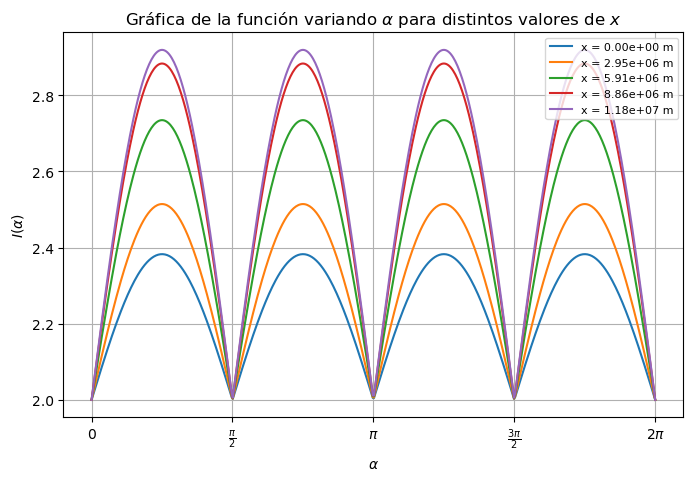

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros físicos
lambda_ = 532e-9  # Longitud de onda en metros
k = 2 * np.pi / lambda_  # Número de onda
x_values = np.linspace(0, k, 5)  # 10 valores de x distribuidos en el rango

# Definir la función de intensidad
def Intensity(alpha, kx, chi, mu=0):
    return (np.sqrt(2 - 2 * np.cos(chi) * np.cos(2*kx + mu)) * np.abs(np.sin(2*alpha)) / 2) + 2

# Rango de valores para alpha
alpha_values = np.linspace(0, 2*np.pi, 500)

# Crear la figura
plt.figure(figsize=(8, 5))

# Graficar la función para varios valores de x
for x in x_values:
    kx_values = k * x  # Calculamos kx
    y_values = Intensity(alpha_values, kx_values, np.pi/4)
    plt.plot(alpha_values, y_values, label=f"x = {x:.2e} m")

# Definir los valores clave de alpha en el eje x
key_alphas = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
key_labels = [r"$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"]
plt.xticks(key_alphas, key_labels)

plt.xlabel(r"$\alpha$")
plt.ylabel(r"$I(\alpha)$")
plt.title(r"Gráfica de la función variando $\alpha$ para distintos valores de $x$")
plt.legend(loc='upper right', fontsize=8)
plt.grid()
plt.show()
